In [2]:
from knowledge_graph import build_nx_graph, goldstandard_Graph, get_DiGraph_from_file, get_AC1_Graph_from_file, read_concepts_from_file, ac1_Graph
from sparql_queries import query_paths_to_entity, query_freq_wikidata, query_freq_dbpedia
from preprocessing import get_cscw19_gold_ideas_in_format
from connection import convert_dbp_wikid_ids, wikidata_sparql_request
from visualize import get_graphic_G, color_map
from analytics import get_subgraph_from, get_subgraph_from_dac,remove_backward_edges, all_shortest_paths_and_LCS, map_key_pos

In [3]:
import networkx as nx
import json
import matplotlib.pyplot as plt
import numpy as np

/home/luka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


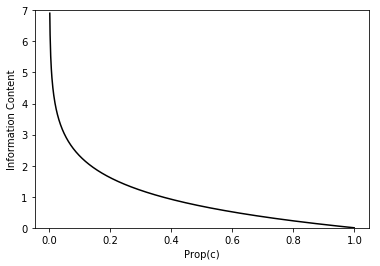

In [36]:
x = np.arange(0,1,0.001)
plt.plot(x, list(map(ic, x)), "k" )
plt.xlabel("Prop(c)")
plt.ylabel("Information Content")
plt.ylim((0,7))

In [3]:
DiGold = get_DiGraph_from_file()

In [4]:
concepts = read_concepts_from_file("data/gold_wiki_concepts.json")

In [5]:
ac1_concepts = read_concepts_from_file("data/ac1_wiki_concepts.json")

In [6]:
DiAC1 = get_AC1_Graph_from_file()

In [7]:
dac = remove_backward_edges(DiGold, "Q35120")
print(len(list(dac.edges())), len(list(DiGold.edges())), len(list(nx.edge_dfs(DiGold, "Q35120"))))

3705 3888 3848


In [8]:
from IPython.display import Image, display

def draw_graph(name, graph, concepts):
    concepts_in_graph = [n for n in concepts if n[0] in graph.nodes()]
    g = get_graphic_G(graph, concepts_in_graph)
    im = Image(g.create_png())
    display(im)
    g.write_png(name+".png")


In [9]:
#from graph_tool.all import *

In [10]:
#SubG = get_subgraph_from_dac(dac,"Q197")

#g = load_graph("data/dac_gold","gml",)
#g.is_directed()
#list(g.get_vertices())

In [11]:
#graph_draw(g)

In [9]:
def ic(prop):
    return -np.log(prop)

In [4]:
def wpath(length, freq, k=0.8):
    return 1/(1+length*np.power(k,-np.log(freq/5000000)))

In [49]:
wpath(5,11)

0.7854080377697628

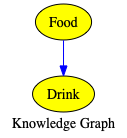

In [12]:
SubG = get_subgraph_from_dac(dac,"Q2095")
draw_graph("pic/food",SubG , concepts)

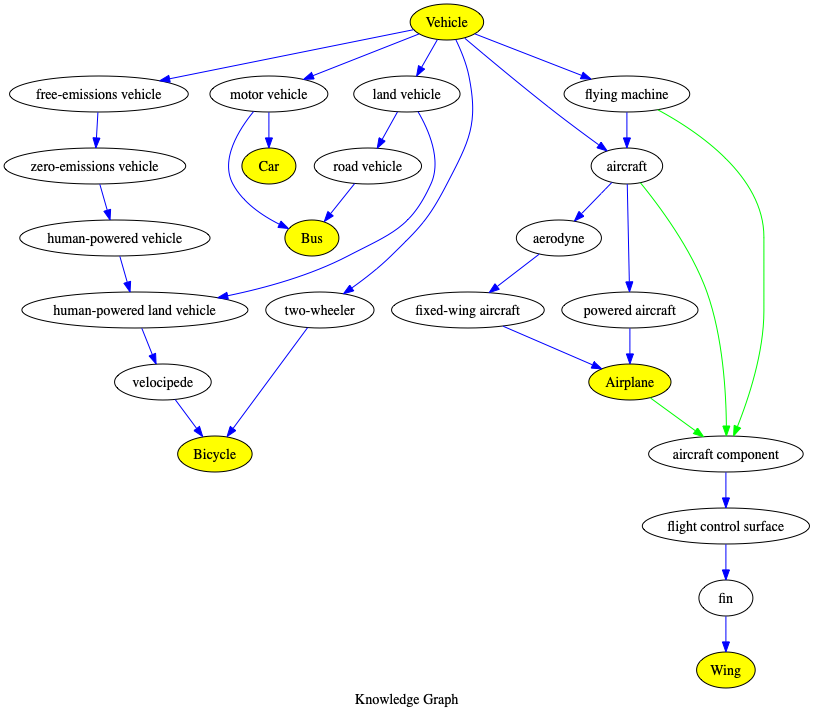

In [13]:
SubG_AC1 = get_subgraph_from(DiAC1,"Q42889", 10)
draw_graph("pic/test",SubG_AC1 , ac1_concepts)